In [2]:
import itertools

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import bioframe as bf
import bioframe.vis

In [4]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)
df1

,chrom,start,end
0,chr1,1,5
1,chr1,3,8
2,chr1,8,10
3,chr1,12,14


In [5]:
df2 = bioframe.from_any(
    [['chr1', 4, 8],
     ['chr1', 10, 11]], 
    name_col='chrom')
df2

,chrom,start,end
0,chr1,4,8
1,chr1,10,11


In [6]:
bioframe.is_bedframe(df2) # checks whether dataframe meets rules to be a bedframe

True

In [7]:
overlapping_intervals = bf.overlap(df1, df2, how='inner', suffixes=('_1','_2'))
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8


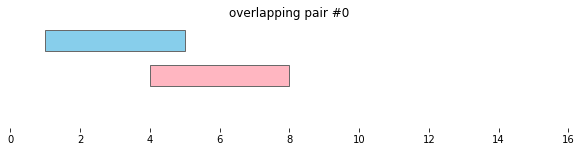

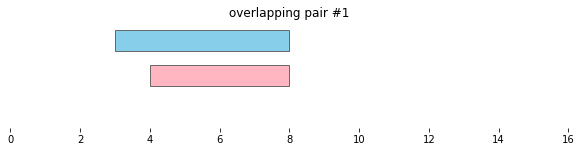

In [8]:
for i, reg_pair in overlapping_intervals.iterrows(): 
    bf.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (0,16),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')